In [1]:
#Library needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#this line will allow to set an option in pandas for it display all the columns of the dataset 
# what ever the number
pd.set_option('display.max_columns', None)

In [2]:
#upload csv file

species = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/species.csv", sep=';', index_col='Index')

index= pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/Data/Species_diversity.csv", sep=';')

Merge of the dataset to get the indexes in the species tables

In [3]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site            3999 non-null   object 
 1   Total           3999 non-null   float64
 2   Nb_dif_Sp       3999 non-null   int64  
 3   Margalef_Index  3999 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 125.1+ KB


In [76]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [4]:
#Inner join
species_2 = pd.merge(left=species, right=index, on='site')

In [78]:
species_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_class

Based on the exploration I select the following features:
- Numerical: Nursery_seagrass, nursery_mangrove, connectivity, coral_cover, reef_complexity, tourist fishing, marina slip 25km, SG permits 50km, rec reliance, commercial pound landed, artificial reef, pop per aera reef 20km, recreational fishermen 50km, Depth, wave exposure, depth sbrocco, deepwater, SST, Marina slips 10 km, and NPP

- Categorical Region, habibtat type class LV2

- kept the adding index col to get the number of fish per sites, the number of different fish observed per site and the margaleft index showing the fish diversity

The numerical cols contain missing values for coral_cover, reef_complexity, and connectivity by filling them I will use the mean of the values for each features in function of the Habitat_type_classLV2 and region.

In [92]:
species_2.columns

Index(['site', 'model', 'Year', 'Month', 'Latitude', 'Longitude', 'Depth',
       'Region', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Habitat_type_classLV0', 'Habitat_type_classLV2',
       'Coral_area_UFRTM_20km', 'Coral_area_UFRTM_200km', 'Depth_Sbrocco',
       'Deepwater', 'FSA', 'Marina_slips_10km', 'Marina_slips_25km',
       'Marine_reserve', 'Population_20km', 'Population_50km',
       'Recreational_fishermen_50km', 'Tourist_fishing',
       'Artificial_reefs_1km', 'SG_permits_50km', 'SG_charter_permits_25km',
       'Total_gravity_intercept', 'Total_gravity', 'Keys_Divisions', 'FKNMS',
       'DryTortugas', 'BNP', 'CoralECA', 'Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Comm_engagement', 'Comm_reliance',
       'Rec_engagement', 'Rec_reliance', 'Commercial_pounds_landed',
       'Pop_per_area_reef_20km', 'Random', 'impact', 'YEAR', 'HABITAT_CD',
       'REGION', 'PCT_CORAL', 'MAX_HARD_RELIEF', 'no.divers',
       'Diversity_in

In [5]:
#Create a copy of the data set to drop the unuseable columns and fill the missing values

test = species_2.loc[:,['Depth',
       'Region', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure','Habitat_type_classLV2', 'Depth_Sbrocco',
       'Deepwater','Marina_slips_10km', 'Tourist_fishing',
       'Artificial_reefs_1km','SG_permits_50km', 'Total_gravity','Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Diversity_index', 'Total', 'Nb_dif_Sp', 'Margalef_Index'
]]

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depth                  3999 non-null   float64
 1   Region                 3999 non-null   object 
 2   Coral_cover            3292 non-null   float64
 3   Reef_complexity        3292 non-null   float64
 4   SST                    3999 non-null   float64
 5   NPP                    3999 non-null   float64
 6   Wave_exposure          3999 non-null   float64
 7   Habitat_type_classLV2  3999 non-null   object 
 8   Depth_Sbrocco          3999 non-null   float64
 9   Deepwater              3999 non-null   float64
 10  Marina_slips_10km      3999 non-null   int64  
 11  Tourist_fishing        3999 non-null   float64
 12  Artificial_reefs_1km   3999 non-null   int64  
 13  SG_permits_50km        3999 non-null   int64  
 14  Total_gravity          3896 non-null   float64
 15  Nurs

In [6]:
#Fill the missing values by the mean of the values in function of habitat type class lv2
test.groupby(['Habitat_type_classLV2','Region'])['Coral_cover'].median()


Habitat_type_classLV2                Region  
Aggregate Reef                       DRY TORT    4.740157
                                     FLA KEYS    2.994240
                                     SEFCRI      1.752857
Colonized Pavement                   FLA KEYS    2.252332
                                     SEFCRI      1.249485
Individual or Aggregated Patch Reef  DRY TORT    4.717778
                                     FLA KEYS    6.587518
                                     SEFCRI      1.746295
Pavement                             FLA KEYS    2.737093
Pavement with Sand Channels          DRY TORT    2.000000
                                     FLA KEYS    2.514799
Reef Rubble                          FLA KEYS    1.000000
Ridge                                FLA KEYS    2.546567
                                     SEFCRI      1.000000
Spur and Groove                      DRY TORT    5.306240
                                     FLA KEYS    3.274208
                          

In [7]:
test.loc[test.Coral_cover.isna(),['Habitat_type_classLV2','Region']]

,Habitat_type_classLV2,Region
1350,Spur and Groove,SEFCRI
1351,Spur and Groove,SEFCRI
1352,Spur and Groove,SEFCRI
1353,Spur and Groove,SEFCRI
1354,Spur and Groove,SEFCRI
...,...,...
3327,Ridge,SEFCRI
3328,Ridge,SEFCRI
3350,Colonized Pavement,SEFCRI
3394,Ridge,SEFCRI


In [8]:
coral_median = test.groupby(['Habitat_type_classLV2','Region'])['Coral_cover'].median().astype(int).to_dict()

In [9]:
coral_median.keys()

dict_keys([('Aggregate Reef', 'DRY TORT'), ('Aggregate Reef', 'FLA KEYS'), ('Aggregate Reef', 'SEFCRI'), ('Colonized Pavement', 'FLA KEYS'), ('Colonized Pavement', 'SEFCRI'), ('Individual or Aggregated Patch Reef', 'DRY TORT'), ('Individual or Aggregated Patch Reef', 'FLA KEYS'), ('Individual or Aggregated Patch Reef', 'SEFCRI'), ('Pavement', 'FLA KEYS'), ('Pavement with Sand Channels', 'DRY TORT'), ('Pavement with Sand Channels', 'FLA KEYS'), ('Reef Rubble', 'FLA KEYS'), ('Ridge', 'FLA KEYS'), ('Ridge', 'SEFCRI'), ('Spur and Groove', 'DRY TORT'), ('Spur and Groove', 'FLA KEYS'), ('Spur and Groove', 'SEFCRI')])

In [10]:
coral_median[('Aggregate Reef', 'DRY TORT')]

4

In [11]:
def coral_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val = coral_median[Habitat_Region]
    return val

In [12]:
coral_fill_na(['Aggregate Reef', 'DRY TORT'])

4

In [13]:
for Habitat_type_classLV2,Region in coral_median.keys():
    temp = test.loc[(test.Habitat_type_classLV2 == Habitat_type_classLV2) & (test.Region == Region), :]
    missing_val_index = temp.loc[temp.Coral_cover.isna()].index
    test.loc[missing_val_index, 'Coral_cover'] = coral_fill_na([Habitat_type_classLV2,Region])

The same logic is used for reef complexity and connectivity

In [14]:
#Reef complixity

Reef_median = test.groupby(['Habitat_type_classLV2','Region'])['Reef_complexity'].median().astype(int).to_dict()

def reef_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_reef = Reef_median[Habitat_Region]
    return val_reef

for Habitat_type_classLV2,Region in Reef_median.keys():
    temp = test.loc[(test.Habitat_type_classLV2 == Habitat_type_classLV2) & (test.Region == Region), :]
    missing_val_index = temp.loc[temp.Reef_complexity.isna()].index
    test.loc[missing_val_index, 'Reef_complexity'] = reef_fill_na([Habitat_type_classLV2,Region])


In [15]:
#Connectivity

conn_median = test.groupby(['Habitat_type_classLV2','Region'])['connectivity'].median().astype(int).to_dict()

def conn_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_conn = Reef_median[Habitat_Region]
    return val_conn

for Habitat_type_classLV2,Region in conn_median.keys():
    temp = test.loc[(test.Habitat_type_classLV2 == Habitat_type_classLV2) & (test.Region == Region), :]
    missing_val_index = temp.loc[temp.connectivity.isna()].index
    test.loc[missing_val_index, 'connectivity'] = reef_fill_na([Habitat_type_classLV2,Region])

In [16]:
#Total_gravity

grav_median = test.groupby(['Habitat_type_classLV2','Region'])['Total_gravity'].median().astype(int).to_dict()

def grav_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_grav = Reef_median[Habitat_Region]
    return val_grav

for Habitat_type_classLV2,Region in grav_median.keys():
    temp = test.loc[(test.Habitat_type_classLV2 == Habitat_type_classLV2) & (test.Region == Region), :]
    missing_val_index = temp.loc[temp.Total_gravity.isna()].index
    test.loc[missing_val_index, 'Total_gravity'] = grav_fill_na([Habitat_type_classLV2,Region])

In [106]:
#Correlation between those features

test_num = test.select_dtypes(include=np.number) 

px.imshow(test_num.corr())

The Categorical features are converting by one_hot_encoding

In [120]:
#Isolation of the categorical columns
#test_cat = test.select_dtypes(exclude=np.number)

In [121]:
#test_cat_dumm = pd.get_dummies(test_cat, dtype=float)

In [122]:
#concat of dummies variables with the main dataset

#test2 = pd.concat([test,test_cat_dumm], axis=1)

In [123]:
#test_proceed = test2.drop(test_cat, axis=1)

In [124]:
#px.imshow(test_proceed.corr())

This dataframe will be save for ML training

The borruta analysis by R confirmed the features selected are good to predict the diversity index.

In [17]:
#Load the dataset for the ML part
df= pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/species_ML_2.csv")

In [4]:
#df_ordered = df.loc[:,['Depth', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Depth_Sbrocco', 'Deepwater', 'Marina_slips_10km',
       'Tourist_fishing', 'Artificial_reefs_1km', 'SG_permits_50km',
       'Total_gravity', 'Nursery_seagrass', 'Nursery_mangroves',
       'connectivity', 'Total', 'Nb_dif_Sp',
       'Margalef_Index', 'Region_DRY TORT', 'Region_FLA KEYS', 'Region_SEFCRI',
       'Habitat_type_classLV2_Aggregate Reef',
       'Habitat_type_classLV2_Colonized Pavement',
       'Habitat_type_classLV2_Individual or Aggregated Patch Reef',
       'Habitat_type_classLV2_Pavement',
       'Habitat_type_classLV2_Pavement with Sand Channels',
       'Habitat_type_classLV2_Reef Rubble', 'Habitat_type_classLV2_Ridge',
       'Habitat_type_classLV2_Spur and Groove', 'Diversity_index']]

In [46]:
#Split the dataset into train and test sets

#X = df_ordered.iloc[:, :30].values
#y = df_ordered.iloc[:, 30].values

In [48]:
#ensure no value are NaN in X by replacing NaN with 0
#X[np.isnan(X)] = 0

In [49]:
#split the dataset into train and test
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [43]:
#The data are scale
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

Test of the simplest model linear regression

In [36]:
#from sklearn.linear_model import LinearRegression

#lr_model = LinearRegression()
#lr_model.fit(X_train, y_train)


LinearRegression()

In [37]:
#y_pred_lr = lr_model.predict(X_test)

In [38]:
# Evaluating the model
#from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

# Evaluating the model
#mae_LR = mean_absolute_error(y_test, y_pred_lr)
#mse_LR = mean_squared_error(y_test, y_pred_lr)
#r_squared_LR = r2_score(y_test,y_pred_lr)
#rmse_LR = np.sqrt(mse_LR)

# Print the evaluation metrics
#print('Mean Absolute Error (MAE):', mae_LR)
#print('Mean Squared Error (MSE):', mse_LR)
#print('R-squared (R²):', r_squared_LR)
#print('Root Mean Squared Error (RMSE):', rmse_LR)

Mean Absolute Error (MAE): 84588577779.19083
Mean Squared Error (MSE): 1.5399934205868454e+22
R-squared (R²): -1.4080690998802322e+24
Root Mean Squared Error (RMSE): 124096471367.51494


Test the random forest regressor model

In [39]:
#from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
#regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

# Fit the regressor with x and y data
#regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [40]:
# Making predictions on the same data or new data
#predictions = regressor.predict(X_test)

In [41]:
#evaluate the model

# Evaluating the model
#mae_RF = mean_absolute_error(y_test, predictions)
#mse_RF = mean_squared_error(y_test, predictions)
#r_squared_RF = r2_score(y_test,predictions)
#rmse_RF = np.sqrt(mse_RF)

# Print the evaluation metrics
#print('Metrics for the LR model')
#print('Mean Absolute Error (MAE):', mae_LR)
# print('Mean Squared Error (MSE):', mse_LR)
# print('R-squared (R²):', r_squared_LR)
# print('Root Mean Squared Error (RMSE):', rmse_LR)
print()
# Print the evaluation metrics
# print('Metrics for the RF model')
# print('Mean Absolute Error (MAE):', mae_RF)
# print('Mean Squared Error (MSE):', mse_RF)
# print('R-squared (R²):', r_squared_RF)
# print('Root Mean Squared Error (RMSE):', rmse_RF)

Metrics for the LR model
Mean Absolute Error (MAE): 84588577779.19083
Mean Squared Error (MSE): 1.5399934205868454e+22
R-squared (R²): -1.4080690998802322e+24
Root Mean Squared Error (RMSE): 124096471367.51494

Metrics for the RF model
Mean Absolute Error (MAE): 0.05679872927642709
Mean Squared Error (MSE): 0.0072482520032944005
R-squared (R²): 0.3372673196165591
Root Mean Squared Error (RMSE): 0.08513666662075983


Test of Ridge algorithme with cross validation

In [45]:
#from sklearn.linear_model import RidgeCV

#ridgeCV= RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)
# ridgeCV.fit(X_train, y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1], cv=5)

In [46]:
#y_pred_RCV = ridgeCV.predict(X_test)

In [48]:
# Evaluating the model
#mae_RCV = mean_absolute_error(y_test, y_pred_RCV)
# mse_RCV = mean_squared_error(y_test, y_pred_RCV)
# r_squared_RCV = r2_score(y_test,y_pred_RCV)
# rmse_RCV = np.sqrt(mse_RCV)

# Print the evaluation metrics
print('Metrics for the Ridge CV model')
#print('Mean Absolute Error (MAE):', mae_RCV)
# print('Mean Squared Error (MSE):', mse_RCV)
# print('R-squared (R²):', r_squared_RCV)
# print('Root Mean Squared Error (RMSE):', rmse_RCV)

Metrics for the Ridge CV model
Mean Absolute Error (MAE): 0.0577886397024025
Mean Squared Error (MSE): 0.007550433327624315
R-squared (R²): 0.3096378388887975
Root Mean Squared Error (RMSE): 0.08689322946941444


Try gradient descent algorithms

In [54]:
#split the dataset into train and test
# from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [50]:
#scale the X datasets, mandatory for this type of algorithms

#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

stochastic gradient descent with default parameters

In [51]:
#from sklearn.linear_model import SGDRegressor

#sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=8)

#sgd_reg.fit(X_train, y_train)

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=8, tol=1e-05)

In [52]:
#y_pred_sgd = sgd_reg.predict(X_test)

In [53]:
# Evaluating the model
#mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
#mse_sgd = mean_squared_error(y_test, y_pred_sgd)
#r_squared_sgd = r2_score(y_test,y_pred_sgd)
#rmse_sgd = np.sqrt(mse_sgd)

# Print the evaluation metrics
print('Metrics for the Ridge CV model')
#print('Mean Absolute Error (MAE):', mae_RCV)
# print('Mean Squared Error (MSE):', mse_RCV)
# print('R-squared (R²):', r_squared_RCV)
# print('Root Mean Squared Error (RMSE):', rmse_RCV)
print()
# Print the evaluation metrics
print('Metrics for the Stochastic gradient descent model')
#print('Mean Absolute Error (MAE):', mae_sgd)
# print('Mean Squared Error (MSE):', mse_sgd)
# print('R-squared (R²):', r_squared_sgd)
# print('Root Mean Squared Error (RMSE):', rmse_sgd)

Metrics for the Ridge CV model
Mean Absolute Error (MAE): 0.0577886397024025
Mean Squared Error (MSE): 0.007550433327624315
R-squared (R²): 0.3096378388887975
Root Mean Squared Error (RMSE): 0.08689322946941444

Metrics for the Stochastic gradient descent model
Mean Absolute Error (MAE): 0.05784692159835524
Mean Squared Error (MSE): 0.0075750275596847836
R-squared (R²): 0.30738910342430226
Root Mean Squared Error (RMSE): 0.08703463425375431


Test of polynomial Regression because the linear model are not adapt to the diversity_index values. To test it, addition of the square of each feature in the training set as a new feature

In [55]:
#from sklearn.preprocessing import PolynomialFeatures
#poly_features = PolynomialFeatures(degree=2, include_bias=False)
#X_poly= poly_features.fit_transform(X_train)

In [58]:
#lin_reg_pol = LinearRegression()
#lin_reg_pol.fit(X_poly, y_train)

LinearRegression()

Try to do a learning curve to see which is the better between linear and polynomial for our data. First a linear model then a polynomial model.

In [63]:
#from sklearn.model_selection import learning_curve

#train_sizes, train_scores, valid_scores = learning_curve(
    #LinearRegression(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    #scoring="neg_root_mean_squared_error"
)
#train_errors = -train_scores.mean(axis=1)
#valid_errors = -valid_scores.mean(axis=1)

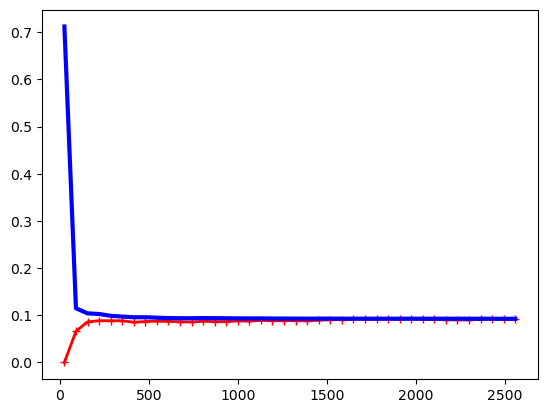

In [65]:
#plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
#plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
#plt.show()

In [69]:
#from sklearn.pipeline import make_pipeline

#polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

#train_sizes2, train_scores2, valid_scores2 = learning_curve(
    polynomial_regression, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)

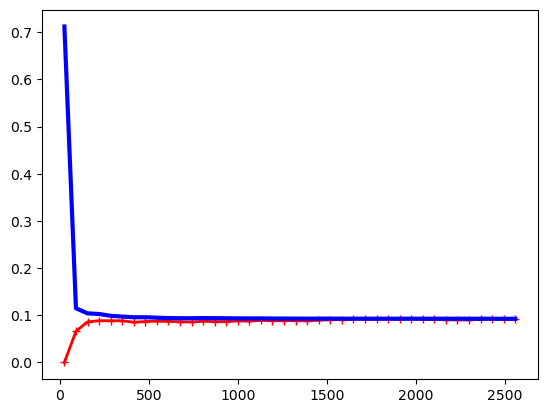

In [70]:
#plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
#plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
#plt.show()

This shows that, We have an overfitting with the data where the RMSE (in the y axis) is low but the train (in red) and the valid (in blue) are overlap early in the training under 100 iteration or Epoch (x-axis). These types of models are not adapt to our data for predicting the diversity_index. Try ensemble method gradient boosting to see if we can by_pass the overfitting. 

In [134]:
#Seems to be the better parameters for this models because it reach the R² at 0.34 the better for the moment compared to the others models
#from sklearn.ensemble import GradientBoostingRegressor
#gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=130, n_iter_no_change=10,
                                 learning_rate=0.5, random_state=19)
#gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=5, n_estimators=130,
                          n_iter_no_change=10, random_state=19)

In [135]:
#gbrt.n_estimators_

12

All of those not work we see a clear overfitting of the data go back at the beguinning to try ameliorate the model

In [18]:
#look at the order of the variables
test.columns

Index(['Depth', 'Region', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Habitat_type_classLV2', 'Depth_Sbrocco', 'Deepwater',
       'Marina_slips_10km', 'Tourist_fishing', 'Artificial_reefs_1km',
       'SG_permits_50km', 'Total_gravity', 'Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Diversity_index', 'Total',
       'Nb_dif_Sp', 'Margalef_Index'],
      dtype='object')

In [19]:
#Reorder of the variables to get the diversity index at the end
test = test.loc[:,['Depth', 'Region', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Habitat_type_classLV2', 'Depth_Sbrocco', 'Deepwater',
       'Marina_slips_10km', 'Tourist_fishing', 'Artificial_reefs_1km',
       'SG_permits_50km', 'Total_gravity', 'Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Total',
       'Nb_dif_Sp', 'Margalef_Index','Diversity_index']]

In [21]:
test_num = test.select_dtypes(include=np.number)

test_num.skew()

Depth                   0.607977
Coral_cover             3.688550
Reef_complexity         2.154000
SST                    -1.149358
NPP                     0.839558
Wave_exposure          -3.099313
Depth_Sbrocco          -1.026797
Deepwater               1.962738
Marina_slips_10km       1.669053
Tourist_fishing         1.106022
Artificial_reefs_1km    6.148546
SG_permits_50km        -0.056372
Total_gravity           4.133831
Nursery_seagrass        0.928808
Nursery_mangroves       4.950175
connectivity            2.094855
Total                   3.628007
Nb_dif_Sp              -0.161982
Margalef_Index          3.628007
Diversity_index        -2.626134
dtype: float64

We observed the many features has a positive skew meaning they has an heavy tail at the rigth of the mean. At the inverse the Target shows an heavy tail at the left (negative skew). It should helping the model performance by transforming/normlized the data with bucket-size for the feature and the log for the target. 
The transformation will do in first on the train set to evaluate the model performance on the train sets with this transformation.

Try to make a pipeline to transform the data with:
- for numerical column a robust_scaler
- for categorical a OneHotEncode

In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(test, test_size=0.2, random_state=21)

In [23]:
diversity_predictors = train_set.drop("Diversity_index", axis=1)
diversity_target = train_set["Diversity_index"].copy()

In [24]:
#train to scale the diversity_target
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

target_scaler_rob = RobustScaler()
scaled_labels_rob = target_scaler_rob.fit_transform(diversity_target.to_frame())

target_scaler_pt = PowerTransformer()
scaled_labels_pt = target_scaler_pt.fit_transform(diversity_target.to_frame())

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_labels = log_transformer.transform(diversity_target)

target_scaler_std = StandardScaler()
scaled_labels_std = target_scaler_std.fit_transform(diversity_target.to_frame())




#test the sale of the target with a linear regression
#model = LinearRegression()
#model.fit(diversity_predictors[['Depth']], scaled_labels)
#some_new_data = diversity_predictors[['Depth']].iloc[:5]

#scaled_predictions = model.predict(some_new_data)
#predictions = target_scaler.inverse_transform(scaled_predictions)


c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



#Look at the distribution of the target ori and after robust scaling and log transfo

<Axes: xlabel='Diversity_index', ylabel='Count'>

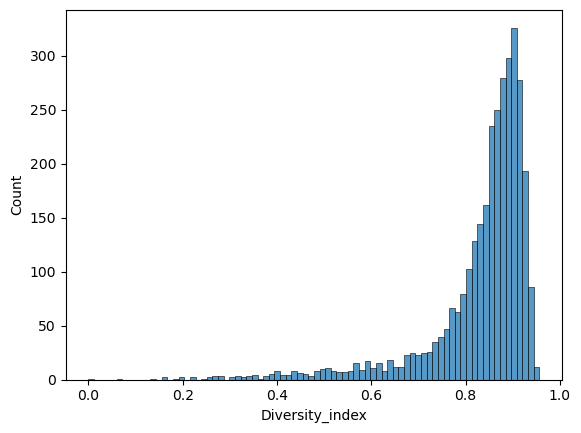

In [25]:
#Original data
sns.histplot(diversity_target)

<Axes: ylabel='Count'>

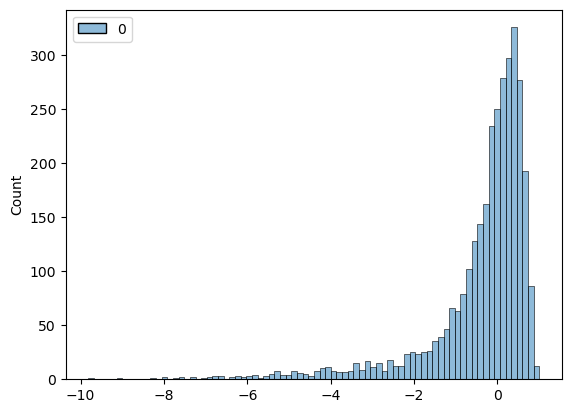

In [26]:
#after robust transform, the distribution look the same as the original
sns.histplot(scaled_labels_rob)

<Axes: ylabel='Count'>

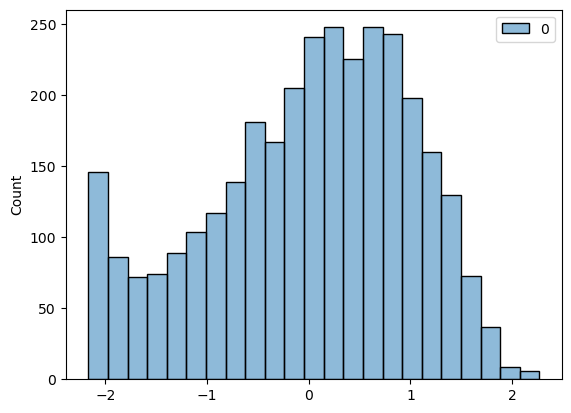

In [27]:
#After PowerTransform
sns.histplot(scaled_labels_pt)

<Axes: xlabel='Diversity_index', ylabel='Count'>

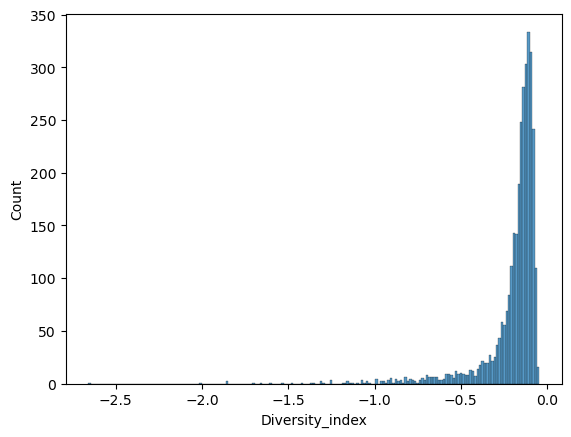

In [28]:
#After log transformation
sns.histplot(log_labels)

<Axes: ylabel='Count'>

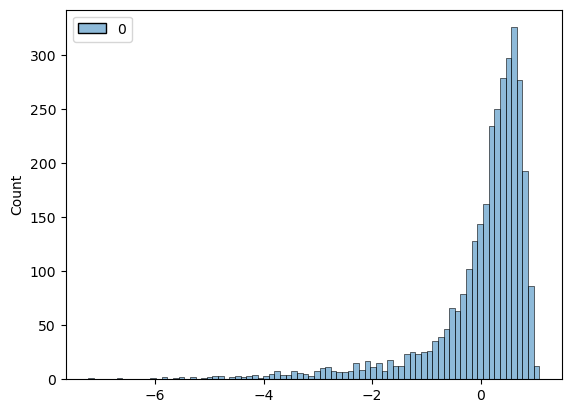

In [29]:
#standard scale
sns.histplot(scaled_labels_std)

Scaling the diversity index by power transform seems to decrease the skew and concentrate the data. Keep this transformation for the models.

In [30]:
#pipeline for the numerical cols
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(
    PowerTransformer()
)

In [31]:
#pipeline for the categorical cols
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")
)

In [32]:
#Transform the data for the models
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)



In [33]:
diversity_processed = preprocessing.fit_transform(diversity_predictors)
diversity_processed.shape

(3199, 30)

In [34]:
preprocessing.get_feature_names_out()

array(['pipeline-1__Depth', 'pipeline-1__Coral_cover',
       'pipeline-1__Reef_complexity', 'pipeline-1__SST',
       'pipeline-1__NPP', 'pipeline-1__Wave_exposure',
       'pipeline-1__Depth_Sbrocco', 'pipeline-1__Deepwater',
       'pipeline-1__Marina_slips_10km', 'pipeline-1__Tourist_fishing',
       'pipeline-1__Artificial_reefs_1km', 'pipeline-1__SG_permits_50km',
       'pipeline-1__Total_gravity', 'pipeline-1__Nursery_seagrass',
       'pipeline-1__Nursery_mangroves', 'pipeline-1__connectivity',
       'pipeline-1__Total', 'pipeline-1__Nb_dif_Sp',
       'pipeline-1__Margalef_Index', 'pipeline-2__Region_DRY TORT',
       'pipeline-2__Region_FLA KEYS', 'pipeline-2__Region_SEFCRI',
       'pipeline-2__Habitat_type_classLV2_Aggregate Reef',
       'pipeline-2__Habitat_type_classLV2_Colonized Pavement',
       'pipeline-2__Habitat_type_classLV2_Individual or Aggregated Patch Reef',
       'pipeline-2__Habitat_type_classLV2_Pavement',
       'pipeline-2__Habitat_type_classLV2_Paveme

The data are processing, now test a linear regression models

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800AC2BF10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800B0DA8B0>)])),
                ('linearregression', LinearRegression())])

In [36]:
predictions = lin_reg.predict(diversity_predictors)

In [37]:
predictions[:5]

array([0.80659808, 0.89139428, 0.81138123, 0.81588604, 0.89578029])

In [38]:
diversity_target.iloc[:5].values

array([0.75143533, 0.90936386, 0.8142197 , 0.83758985, 0.88709915])

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating the model
mae_train = mean_absolute_error(diversity_target, predictions)
mse_train = mean_squared_error(diversity_target, predictions)
r_squared_train = r2_score(diversity_target, predictions)
rmse_train = np.sqrt(mse_train)

# Print the evaluation metrics

print('Mean Absolute Error (MAE):', mae_train)
print('Mean Squared Error (MSE):', mse_train)
print('R-squared (R²):', r_squared_train)
print('Root Mean Squared Error (RMSE):', rmse_train)

Mean Absolute Error (MAE): 0.06412519328836232
Mean Squared Error (MSE): 0.008600748380018581
R-squared (R²): 0.3505174133175475
Root Mean Squared Error (RMSE): 0.0927402198618193


The linear regression is maybe to restricted for the problem, try with a decision tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())

tree_reg.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800AC2BF10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800B0DA8B0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [41]:
pred_DT = tree_reg.predict(diversity_predictors)

In [42]:
# Evaluating the model
mae_train_DT = mean_absolute_error(diversity_target, pred_DT)
mse_train_DT = mean_squared_error(diversity_target, pred_DT)
r_squared_train_DT = r2_score(diversity_target, pred_DT)
rmse_train_DT = np.sqrt(mse_train_DT)

# Print the evaluation metrics

print('Mean Absolute Error (MAE):', mae_train_DT)
print('Mean Squared Error (MSE):', mse_train_DT)
print('R-squared (R²):', r_squared_train_DT)
print('Root Mean Squared Error (RMSE):', rmse_train_DT)

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R-squared (R²): 1.0
Root Mean Squared Error (RMSE): 0.0


In [43]:
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(tree_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", cv=5)

In [44]:
pd.Series(tree_rmse).describe()

count    5.000000
mean     0.119428
std      0.008638
min      0.108134
25%      0.115842
50%      0.118288
75%      0.123664
max      0.131209
dtype: float64

In [45]:
lin_rmse =  -cross_val_score(lin_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", cv=5)

In [46]:
pd.Series(lin_rmse).describe()

count    5.000000
mean     0.094725
std      0.007207
min      0.086633
25%      0.091275
50%      0.094011
75%      0.095621
max      0.106085
dtype: float64

Try a random forest regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=19))
forest_rmse =  -cross_val_score(forest_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", 
                             cv=5)

In [51]:
pd.Series(forest_rmse).describe()

count    5.000000
mean     0.084792
std      0.004649
min      0.079154
25%      0.080850
50%      0.085602
75%      0.089167
max      0.089189
dtype: float64

The better seems to be the Linear Regression which get a R² of 0.39 and low RMSE (see cross validation), try to fine tune the model to see if I can improve it.
First grid search to find the better hyperparameter for the model.

In [49]:
from sklearn.linear_model import Ridge

Ridge_reg = make_pipeline(preprocessing,
                           Ridge(alpha=2, solver='auto', random_state=19))
Ridge_rmse =  -cross_val_score(Ridge_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", 
                             cv=5)

In [50]:
pd.Series(Ridge_rmse).describe()

count    5.000000
mean     0.093802
std      0.006001
min      0.086729
25%      0.090849
50%      0.093646
75%      0.094805
max      0.102981
dtype: float64

Try to fine tune the model and try a gradient boosting and RF model

In [68]:
#try a xgboost with grid searchcv

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()

parameters = {
    'nthread':[4],
    'objective':['reg:linear', 'reg:squarederror', 'reg:squaredlogerror', 'reg:absoluteerror'], #the way for regression and its penalty 
    'learning_rate':[0.03, 0.05, 0.07],
    'max_depth':[5,6,7],
    'min_child_weight':[4],
    'silent':[1],
    'subsample':[0.7],
    'n_estimators':[500],
    'eval_metric':['rmse', 'mae', 'rmsle']}

xgb_grid = GridSearchCV(
    xgb1,
    parameters,
    cv =2,
    n_jobs=5, 
    verbose=True
)

xgb_grid.fit(diversity_processed, scaled_labels_pt)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


54 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\xgboost\sklearn.py", line 1108, in fit
    self._Boost

0.41145009688566436
{'eval_metric': 'rmse', 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:absoluteerror', 'silent': 1, 'subsample': 0.7}


In [74]:
#try random forest with grid search cv

param_grid =[
    {
        'n_estimators':[100, 50, 200],
        'max_depth':[4,6,8],
        }
        
]

grid_search = GridSearchCV(RandomForestRegressor(random_state=19), param_grid, cv=2, n_jobs=5, verbose=True,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(diversity_processed, scaled_labels_pt.ravel())

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=19), n_jobs=5,
             param_grid=[{'max_depth': [4, 6, 8],
                          'n_estimators': [100, 50, 200]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [77]:
print(abs(grid_search.best_score_))
print(grid_search.best_params_)

0.7696634018499355
{'max_depth': 8, 'n_estimators': 200}


In [127]:
#test with the gridsearch parameters

from sklearn.ensemble import RandomForestRegressor

forest_reg2 = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=19,
                                                 max_depth=8, n_estimators=200))
forest_rmse2 =  -cross_val_score(forest_reg2, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", 
                             cv=5)


In [128]:
pd.Series(forest_rmse2).describe()

count    5.000000
mean     0.086418
std      0.004093
min      0.081762
25%      0.083593
50%      0.085385
75%      0.090526
max      0.090824
dtype: float64

In [83]:
pd.Series(forest_rmse).describe()

count    5.000000
mean     0.084792
std      0.004649
min      0.079154
25%      0.080850
50%      0.085602
75%      0.089167
max      0.089189
dtype: float64

In [52]:
#try the random_forest on the test set

forest_reg.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800AC2BF10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800B0DA8B0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=19))])

In [85]:
X_test = test_set.drop("Diversity_index", axis=1)
y_test = test_set['Diversity_index'].copy()

In [54]:
final_pred = forest_reg.predict(X_test)

In [87]:
# Evaluating the model
mae_final = mean_absolute_error(y_test, final_pred)
mse_final = mean_squared_error(y_test, final_pred)
r_squared_final = r2_score(y_test, final_pred)
rmse_final = np.sqrt(mse_final)

# Print the evaluation metrics

print('Mean Absolute Error (MAE):', mae_final)
print('Mean Squared Error (MSE):', mse_final)
print('R-squared (R²):', r_squared_final)
print('Root Mean Squared Error (RMSE):', rmse_final)

Mean Absolute Error (MAE): 0.057700826732212517
Mean Squared Error (MSE): 0.007521315593639794
R-squared (R²): 0.4161524260586891
Root Mean Squared Error (RMSE): 0.08672551869916832


In [84]:
forest_reg2.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800AC2BF10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800B0DA8B0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=8, n_estimators=200,
                                       random_state=19))])

In [90]:
X_test_processed = preprocessing.fit_transform(X_test)

In [92]:
final_pred2 = grid_search.predict(X_test_processed)

In [94]:
target_scaler_pt = PowerTransformer()
scaled_testlabels_pt = target_scaler_pt.fit_transform(y_test.to_frame())

In [95]:
# Evaluating the model
mae_final2 = mean_absolute_error(scaled_testlabels_pt, final_pred2)
mse_final2 = mean_squared_error(scaled_testlabels_pt, final_pred2)
r_squared_final2 = r2_score(scaled_testlabels_pt, final_pred2)
rmse_final2 = np.sqrt(mse_final2)

# Print the evaluation metrics
print('Default parameters')
print('Mean Absolute Error (MAE):', mae_final)
print('Mean Squared Error (MSE):', mse_final)
print('R-squared (R²):', r_squared_final)
print('Root Mean Squared Error (RMSE):', rmse_final)
print()
print('With GridSearch')
print('Mean Absolute Error (MAE):', mae_final2)
print('Mean Squared Error (MSE):', mse_final2)
print('R-squared (R²):', r_squared_final2)
print('Root Mean Squared Error (RMSE):', rmse_final2)

Default parameters
Mean Absolute Error (MAE): 0.057700826732212517
Mean Squared Error (MSE): 0.007521315593639794
R-squared (R²): 0.4161524260586891
Root Mean Squared Error (RMSE): 0.08672551869916832

With GridSearch
Mean Absolute Error (MAE): 0.6195270428279835
Mean Squared Error (MSE): 0.5967039072208739
R-squared (R²): 0.40329609277912615
Root Mean Squared Error (RMSE): 0.7724661204356305


Try a similar logic but in splitting the diversity index into categories, ordinaly encode:
- class 1 = high diversity over [0.9
- class 2 = median diversity between ]0.8 : 0.9[
- class 3 = low diversity below 0.8]

In [101]:
test_divCat = test

In [102]:
test_divCat

,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV2,Depth_Sbrocco,Deepwater,Marina_slips_10km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Total,Nb_dif_Sp,Margalef_Index,Diversity_index
0,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Aggregate Reef,-10.0,1182.842773,0,1.649034,0,54,69.0,6.483631e+06,199409.31250,4.618931,964.0,32,144.97,0.877755
1,8.821212,FLA KEYS,6.181818,1.886364,23.578271,577.431946,6.950751,Spur and Groove,-6.0,1048.528198,0,1.675894,0,70,74.0,1.150137e+07,21234.26563,9.984375,620.0,38,93.19,0.912085
2,17.399239,FLA KEYS,7.506345,0.749873,23.551355,595.320252,6.950181,Pavement,-7.0,1441.421387,0,1.676708,0,70,126.0,1.210275e+07,13956.82617,9.984375,1068.0,26,160.63,0.882112
3,9.200000,FLA KEYS,10.000000,0.400000,23.556451,590.443543,6.959807,Pavement,-7.0,1341.421387,0,1.696853,0,70,126.0,1.100320e+07,14876.60742,9.984375,528.0,19,79.34,0.806049
4,8.558032,FLA KEYS,2.870486,0.289415,23.567590,579.874023,6.914992,Pavement,-14.0,900.000000,16,1.697870,0,70,126.0,9.313051e+06,14697.00195,9.984375,740.0,29,111.25,0.829156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,17.953469,SEFCRI,1.000000,0.834130,24.261774,453.504700,7.363275,Individual or Aggregated Patch Reef,-27.0,200.000000,935,54.825044,0,53,1137.0,3.750273e+06,353222.28130,23.764472,257.0,26,38.54,0.829341
3995,7.148084,FLA KEYS,1.246807,0.498723,23.749170,583.637329,7.319593,Pavement,-7.0,1900.000000,23,1.779467,0,91,110.0,1.641656e+07,489712.90630,28.308633,218.0,27,32.67,0.831818
3996,2.455478,FLA KEYS,1.795652,0.535043,24.121240,553.635559,7.216960,Aggregate Reef,-17.0,600.000000,0,43.641268,0,48,559.0,3.953954e+07,18971.01172,40.843137,755.0,27,113.51,0.824709
3997,8.145070,SEFCRI,1.000000,0.601972,24.224939,386.825714,7.371410,Aggregate Reef,-6.0,1300.000000,1038,57.419664,0,53,17036.0,4.721569e+04,77573.35156,21.638298,208.0,16,31.16,0.857023


In [104]:
test_divCat['Diversity_category'] = ['1' if x >= 0.9
                                                   else '2' if 0.8 < x < 0.9 
                                                   else '3' if x <= 0.8 
                                                   else 0 for x in test_divCat['Diversity_index']]

In [105]:
test_divCat

,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV2,Depth_Sbrocco,Deepwater,Marina_slips_10km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Total,Nb_dif_Sp,Margalef_Index,Diversity_index,Diversity_category
0,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Aggregate Reef,-10.0,1182.842773,0,1.649034,0,54,69.0,6.483631e+06,199409.31250,4.618931,964.0,32,144.97,0.877755,2
1,8.821212,FLA KEYS,6.181818,1.886364,23.578271,577.431946,6.950751,Spur and Groove,-6.0,1048.528198,0,1.675894,0,70,74.0,1.150137e+07,21234.26563,9.984375,620.0,38,93.19,0.912085,1
2,17.399239,FLA KEYS,7.506345,0.749873,23.551355,595.320252,6.950181,Pavement,-7.0,1441.421387,0,1.676708,0,70,126.0,1.210275e+07,13956.82617,9.984375,1068.0,26,160.63,0.882112,2
3,9.200000,FLA KEYS,10.000000,0.400000,23.556451,590.443543,6.959807,Pavement,-7.0,1341.421387,0,1.696853,0,70,126.0,1.100320e+07,14876.60742,9.984375,528.0,19,79.34,0.806049,2
4,8.558032,FLA KEYS,2.870486,0.289415,23.567590,579.874023,6.914992,Pavement,-14.0,900.000000,16,1.697870,0,70,126.0,9.313051e+06,14697.00195,9.984375,740.0,29,111.25,0.829156,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,17.953469,SEFCRI,1.000000,0.834130,24.261774,453.504700,7.363275,Individual or Aggregated Patch Reef,-27.0,200.000000,935,54.825044,0,53,1137.0,3.750273e+06,353222.28130,23.764472,257.0,26,38.54,0.829341,2
3995,7.148084,FLA KEYS,1.246807,0.498723,23.749170,583.637329,7.319593,Pavement,-7.0,1900.000000,23,1.779467,0,91,110.0,1.641656e+07,489712.90630,28.308633,218.0,27,32.67,0.831818,2
3996,2.455478,FLA KEYS,1.795652,0.535043,24.121240,553.635559,7.216960,Aggregate Reef,-17.0,600.000000,0,43.641268,0,48,559.0,3.953954e+07,18971.01172,40.843137,755.0,27,113.51,0.824709,2
3997,8.145070,SEFCRI,1.000000,0.601972,24.224939,386.825714,7.371410,Aggregate Reef,-6.0,1300.000000,1038,57.419664,0,53,17036.0,4.721569e+04,77573.35156,21.638298,208.0,16,31.16,0.857023,2


In [108]:
#Splitting in test, train
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(test_divCat, test_size=0.2, random_state=21, stratify=test_divCat['Diversity_category'])

Original data diversity_category repartition


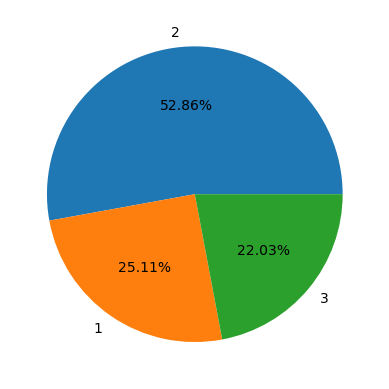


df_train data diversity_category repartition


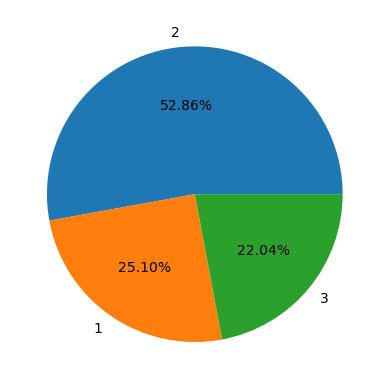


df_test data wine_categories repartition


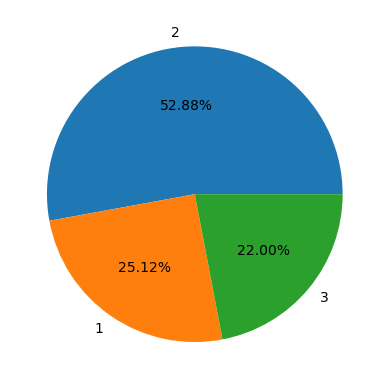

In [110]:
print('Original data diversity_category repartition')
plt.pie(test_divCat.Diversity_category.value_counts(),labels=test_divCat.Diversity_category.value_counts().index,autopct='%1.2f%%')
plt.show()
print()
print('df_train data diversity_category repartition')
plt.pie(train_set.Diversity_category.value_counts(),labels=train_set.Diversity_category.value_counts().index,autopct='%1.2f%%')
plt.show()
print()
print('df_test data wine_categories repartition')
plt.pie(test_set.Diversity_category.value_counts(),labels=test_set.Diversity_category.value_counts().index,autopct='%1.2f%%')
plt.show()

The repartition between the 3 data set for the Diversity category is similar we can pursue by with a data preprocessing test for the X dataset.

In [111]:
#pipeline for the numerical cols
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(
    PowerTransformer()
)

In [112]:
#pipeline for the numerical cols
from sklearn.pipeline import make_pipeline

cat_pipeline = make_pipeline(
    OneHotEncoder()
)

In [113]:
#Transform the data for the models
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing_cat = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [115]:
#split into predictors and target

diversityCat_pred = test_divCat.drop('Diversity_category', axis=1)
diversityCat_target = test_divCat['Diversity_category'].copy()

In [116]:
#fit the transformation to the second dataset
diversityCat_processed = preprocessing_cat.fit_transform(diversityCat_pred)
diversityCat_processed.shape

(3999, 31)

In [117]:
preprocessing_cat.get_feature_names_out()

array(['pipeline-1__Depth', 'pipeline-1__Coral_cover',
       'pipeline-1__Reef_complexity', 'pipeline-1__SST',
       'pipeline-1__NPP', 'pipeline-1__Wave_exposure',
       'pipeline-1__Depth_Sbrocco', 'pipeline-1__Deepwater',
       'pipeline-1__Marina_slips_10km', 'pipeline-1__Tourist_fishing',
       'pipeline-1__Artificial_reefs_1km', 'pipeline-1__SG_permits_50km',
       'pipeline-1__Total_gravity', 'pipeline-1__Nursery_seagrass',
       'pipeline-1__Nursery_mangroves', 'pipeline-1__connectivity',
       'pipeline-1__Total', 'pipeline-1__Nb_dif_Sp',
       'pipeline-1__Margalef_Index', 'pipeline-1__Diversity_index',
       'pipeline-2__Region_DRY TORT', 'pipeline-2__Region_FLA KEYS',
       'pipeline-2__Region_SEFCRI',
       'pipeline-2__Habitat_type_classLV2_Aggregate Reef',
       'pipeline-2__Habitat_type_classLV2_Colonized Pavement',
       'pipeline-2__Habitat_type_classLV2_Individual or Aggregated Patch Reef',
       'pipeline-2__Habitat_type_classLV2_Pavement',
       'pi

Test of random forest classifier and xgboost classifier

In [124]:
#RandomForest with grid search
from sklearn.ensemble import RandomForestClassifier

#try random forest with grid search cv

rfc = RandomForestClassifier(random_state=19)

param_grid =[
    {
        'n_estimators':[100, 50, 200],
        'max_features':['auto', 'sqrt', 'log2'],
        'criterion':['gini','entropy', 'log_loss'],
        'max_depth':[4,6,8],
        }
        
]

RFC_search = GridSearchCV(estimator=rfc, param_grid = param_grid, cv=5)


In [125]:
forest_class = make_pipeline(preprocessing,
                           RFC_search)

In [130]:
forest_class.fit(diversityCat_pred, diversityCat_target)

c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\base.py", line 666, in _validate_pa

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800AC2BF10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800B0DA8B0>)])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=19),
                              param_grid=[{'criterion': ['gini', 'entropy',
                                                         'log_loss'],
                                           'max_depth': [4, 6, 8],
                                           'max_features': ['auto', 'sqrt',
                                                            'log2'],
                                           'n_estimators': [100, 50, 200]}]))])

In [131]:
#split into X and y for the test set
X_test_cat = test_set.drop('Diversity_category', axis=1)
y_test_cat = test_set['Diversity_category'].copy()

In [132]:
predict_RFC = forest_class.predict(X_test_cat)

In [133]:
#evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test_cat,predict_RFC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       423
           3       1.00      1.00      1.00       176

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Overfitting... Try with XGBoost classifier

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

xgboost_class = GradientBoostingClassifier(random_state=19)

param_grid =[
    {
        'loss':['log_loss','exponential'],
        'learning_rate':[0.03, 0.05, 0.07],
        'n_estimators':[500],
        'max_depth':[3, 4, 5, 6],
        }
        
]

xgbClass_search = GridSearchCV(estimator=xgboost_class, param_grid = param_grid, cv=5)

In [141]:
xgbClass = make_pipeline(preprocessing,
                           xgbClass_search)

In [142]:
xgbClass.fit(diversityCat_pred, diversityCat_target)

c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\ensemble\_gb.py", li

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800AC2BF10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001800B0DA8B0>)])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingClassifier(random_state=19),
                              param_grid=[{'learning_rate': [0.03, 0.05, 0.07],
                                           'loss': ['log_loss', 'exponential'],
                                           'max_depth': [3, 4, 5, 6],
                                           'n_estimators': [500]}]))])

In [143]:
xgb_pred = xgbClass.predict(X_test_cat)

In [144]:
print(classification_report(y_test_cat,predict_RFC))
print()
print(classification_report(y_test_cat,xgb_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       423
           3       1.00      1.00      1.00       176

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       423
           3       1.00      1.00      1.00       176

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

